In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#fix balcony column
# drop columns lattitude longtitude eircode 

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv('/Users/patrickmoloney/Downloads/data-rental2.csv', na_values = missing_value_formats)

In [3]:
df.head()

,approx,number,address 1,address 2,address 3,eircode,lattitude,longtitude,lattitude eyre square,longtitude eyre square,...,Distance GMIT,number of rooms,number of bathrooms,price per month,type,connection,BER,balcony,floor,heating
0,no,Chaplaincy House,Ballybane Road,Ballybane,NaN,H91 E2NY,53.279666,-9.008728,53.274839,-9.04863,...,0.209452,4,2,2100,house,NaN,d2,no,NaN,central
1,yes,NaN,cappagh road,knocknacarra,NaN,H91 PV0Y,53.271272,-9.132431,53.274839,-9.04863,...,8.135066,1,1,850,apartment,NaN,c1,no,ground,central
2,no,83,Maoilin,Ballymoneen Road,Moneen,H91 A6CH,53.271473,-9.121873,53.274839,-9.04863,...,7.434207,3,2,1800,house,NaN,a3,no,NaN,central
3,no,NaN,NaN,NaN,NaN,H91 W5RP,53.272302,-9.077226,53.274839,-9.04863,...,4.475861,1,1,850,apartment,NaN,NaN,no,ground,central
4,no,NaN,NaN,NaN,NaN,H91 K46R,53.273859,-9.026788,53.274839,-9.04863,...,1.176212,3,2,1600,house,NaN,d1,no,NaN,central


In [4]:
df.isna().sum()


approx                    206
number                    256
address 1                 194
address 2                 237
address 3                 360
eircode                   237
lattitude                   0
longtitude                  0
lattitude eyre square       0
longtitude eyre square      0
Distance Eyre Square        0
latitude salthill           0
longtitude salthill         0
Distance Salthill           0
latitude collage            0
longtitude collage          0
Distance NUIG               0
latitude gmit               0
longtitude gmit             0
Distance GMIT               0
number of rooms             0
number of bathrooms         0
price per month             0
type                        0
connection                265
BER                        14
balcony                     2
floor                     184
heating                     5
dtype: int64

In [5]:
value_list = ['apartment','studio']

In [6]:
df=df[df.type.isin(value_list)]

In [7]:
df.type.unique()

array(['apartment', 'studio'], dtype=object)

In [8]:
df=df.drop(columns='eircode')
df=df.drop(columns='lattitude') 
df=df.drop(columns='longtitude')
df=df.drop(columns='approx')
df=df.drop(columns='number')
df=df.drop(columns='address 1')
df=df.drop(columns='address 2')
df=df.drop(columns='address 3')
df=df.drop(columns='lattitude eyre square')
df=df.drop(columns='longtitude eyre square')
df=df.drop(columns='latitude salthill')
df=df.drop(columns='longtitude salthill')
df=df.drop(columns='latitude collage')
df=df.drop(columns='longtitude collage')
df=df.drop(columns='latitude gmit')
df=df.drop(columns='longtitude gmit')
# thse change depending on the thing we're looking at 
df=df.drop(columns='type') 
df=df.drop(columns='connection') 
#df=df.drop(columns='balcony') 

In [9]:
df.isna().sum()

Distance Eyre Square     0
Distance Salthill        0
Distance NUIG            0
Distance GMIT            0
number of rooms          0
number of bathrooms      0
price per month          0
BER                     11
balcony                  2
floor                   37
heating                  4
dtype: int64

In [10]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,balcony,floor,heating
1,5.586384,4.231058,4.789334,8.135066,1,1,850,c1,no,ground,central
3,1.922237,1.068662,1.296991,4.475861,1,1,850,NaN,no,ground,central
6,1.150220,0.751666,1.333127,3.533139,2,2,1500,c2,yes,second,electric
8,2.864960,4.719189,3.516732,0.914503,1,1,650,e1,no,ground,electric
9,0.837581,2.722612,1.565598,1.831316,2,1,1800,exempt,no,ground,central


In [11]:
#take a look at columns
df.BER.unique() 

array(['c1', nan, 'c2', 'e1', 'exempt', 'e2', 'c3', 'd2', 'd1', 'b3', 'f',
       'b1', 'a3', 'a1', 'g'], dtype=object)

In [12]:
df.heating.unique() 

array(['central', 'electric', nan], dtype=object)

In [13]:
df.balcony.unique()

array(['no', 'yes', nan], dtype=object)

In [14]:

df = df.dropna() 

In [15]:
df.heating.unique()

array(['central', 'electric'], dtype=object)

In [16]:
df.BER.unique()

array(['c1', 'c2', 'e1', 'exempt', 'e2', 'c3', 'd2', 'd1', 'b3', 'b1',
       'f', 'a3', 'a1', 'g'], dtype=object)

In [17]:
df.describe()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2.156983,2.680707,2.307608,3.254004,1.867347,1.484694,1356.693878
std,1.456978,1.817983,1.534960,1.652991,0.634686,0.585964,356.217059
min,0.137772,0.099173,0.325498,0.426744,1.000000,1.000000,650.000000
25%,0.954541,1.239299,1.078918,2.127786,1.000000,1.000000,1116.750000
50%,1.740680,2.260360,1.722920,2.898607,2.000000,1.000000,1300.000000
75%,3.051234,3.716152,3.219318,4.278643,2.000000,2.000000,1500.000000
max,5.586384,7.003994,6.307277,8.135066,4.000000,3.000000,2825.000000


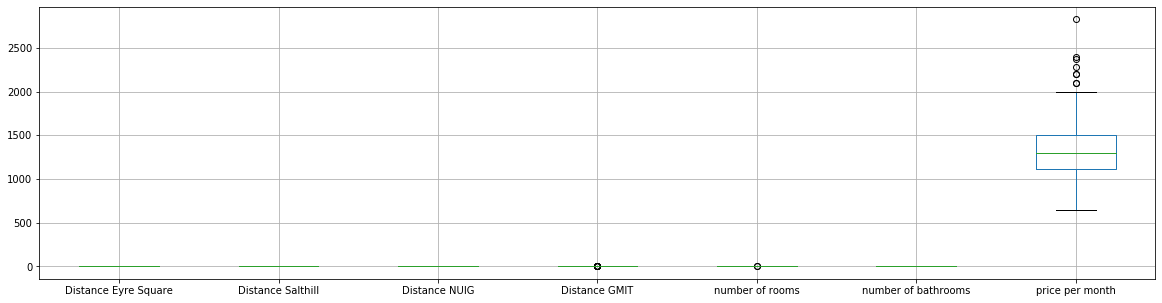

In [18]:
df.boxplot(figsize=(20,5))
plt.show() 

price per month changes wildly, 

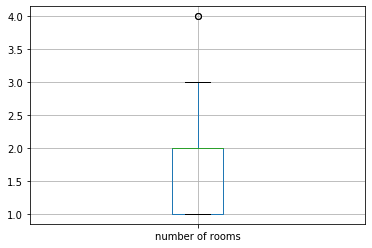

In [19]:
df.boxplot(column='number of rooms')
plt.show()

apartments with 4 rooms is out of the ordinary 

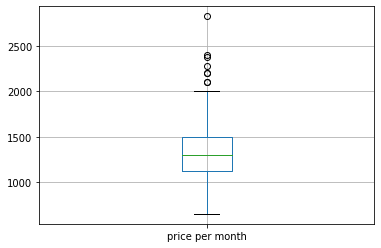

In [21]:
df.boxplot(column='price per month')
plt.show()

anything over 2000 seems to be an outlier 


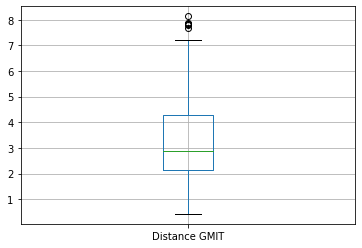

In [23]:
df.boxplot(column='Distance GMIT')
plt.show()

some are pretty far away, likely out in salthill 

In [24]:
df.describe()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2.156983,2.680707,2.307608,3.254004,1.867347,1.484694,1356.693878
std,1.456978,1.817983,1.534960,1.652991,0.634686,0.585964,356.217059
min,0.137772,0.099173,0.325498,0.426744,1.000000,1.000000,650.000000
25%,0.954541,1.239299,1.078918,2.127786,1.000000,1.000000,1116.750000
50%,1.740680,2.260360,1.722920,2.898607,2.000000,1.000000,1300.000000
75%,3.051234,3.716152,3.219318,4.278643,2.000000,2.000000,1500.000000
max,5.586384,7.003994,6.307277,8.135066,4.000000,3.000000,2825.000000


smallest mead for the distance from eyre square, makes sense since its sort of in the middle if we look at hte map from a different page

In [25]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,balcony,floor,heating
1,5.586384,4.231058,4.789334,8.135066,1,1,850,c1,no,ground,central
6,1.150220,0.751666,1.333127,3.533139,2,2,1500,c2,yes,second,electric
8,2.864960,4.719189,3.516732,0.914503,1,1,650,e1,no,ground,electric
9,0.837581,2.722612,1.565598,1.831316,2,1,1800,exempt,no,ground,central
11,2.946082,4.831689,3.334770,1.808406,1,1,1000,exempt,no,ground,central


In [27]:
df.BER.unique()

array(['c1', 'c2', 'e1', 'exempt', 'e2', 'c3', 'd2', 'd1', 'b3', 'b1',
       'f', 'a3', 'a1', 'g'], dtype=object)

In [29]:
scale_mapper = {
    "a1":15,
    "a2":14,
    "a3":13,
    "b1":12,
    "b2":11,
    "b3":10,
    "c1":9,
    "c2":8,
    "c3":7,
    "d1":6,
    "d2":5,
    "e1":4,
    "e2":3,
    "f":2,
    "g":1,
    "exempt":0
}

df['BER'] = df['BER'].replace(scale_mapper)

df.tail()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,balcony,floor,heating
386,2.638566,4.520756,3.014600,1.751473,1,1,950,10,no,ground,electric
389,0.991533,1.500987,0.327196,3.504046,2,2,2000,7,no,second,central
392,1.398883,0.528898,1.540958,3.739695,1,1,920,4,no,ground,electric
393,5.087938,6.748020,5.912348,2.534640,1,1,810,0,no,first,central
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,5,no,ground,electric


In [30]:
df = pd.get_dummies(df, columns=['balcony','heating'])
df.tail()

#this gives us dummy variables for the categorical columns remaining, for mext run might be worth removing the balcony when examing both

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_no,balcony_yes,heating_central,heating_electric
386,2.638566,4.520756,3.014600,1.751473,1,1,950,10,ground,1,0,0,1
389,0.991533,1.500987,0.327196,3.504046,2,2,2000,7,second,1,0,1,0
392,1.398883,0.528898,1.540958,3.739695,1,1,920,4,ground,1,0,0,1
393,5.087938,6.748020,5.912348,2.534640,1,1,810,0,first,1,0,1,0
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,5,ground,1,0,0,1


In [31]:
del df['balcony_no']

In [32]:
del df['heating_central']

In [33]:
df.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_yes,heating_electric
1,5.586384,4.231058,4.789334,8.135066,1,1,850,9,ground,0,0
6,1.150220,0.751666,1.333127,3.533139,2,2,1500,8,second,1,1
8,2.864960,4.719189,3.516732,0.914503,1,1,650,4,ground,0,1
9,0.837581,2.722612,1.565598,1.831316,2,1,1800,0,ground,0,0
11,2.946082,4.831689,3.334770,1.808406,1,1,1000,0,ground,0,0


In [34]:
scale_mapper = {
    "ground":0,
    "first":1,
    "second":2,
    "third":3,
    "fourth":4,
    "fifth":5
}

df['floor'] = df['floor'].replace(scale_mapper)

df.tail()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_yes,heating_electric
386,2.638566,4.520756,3.014600,1.751473,1,1,950,10,0,0,1
389,0.991533,1.500987,0.327196,3.504046,2,2,2000,7,2,0,0
392,1.398883,0.528898,1.540958,3.739695,1,1,920,4,0,0,1
393,5.087938,6.748020,5.912348,2.534640,1,1,810,0,1,0,0
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,5,0,0,1


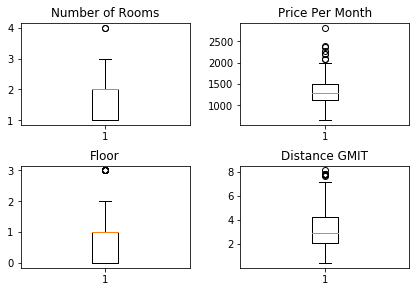

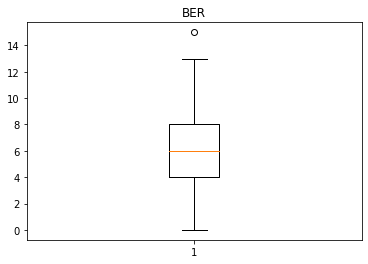

In [37]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(2, 2)


axs[0, 0].boxplot(df['number of rooms'])
axs[0, 0].set_title('Number of Rooms')

axs[0, 1].boxplot(df['price per month'])
axs[0, 1].set_title('Price Per Month')

axs[1, 1].boxplot(df['Distance GMIT'])
axs[1, 1].set_title('Distance GMIT')

axs[1, 0].boxplot(df['floor'])
axs[1, 0].set_title('Floor')



fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

fig, ax = plt.subplots()
ax.boxplot(df['BER'])
ax.set_title('BER')
plt.show()

In [38]:
df['floor'] = df['floor']/5

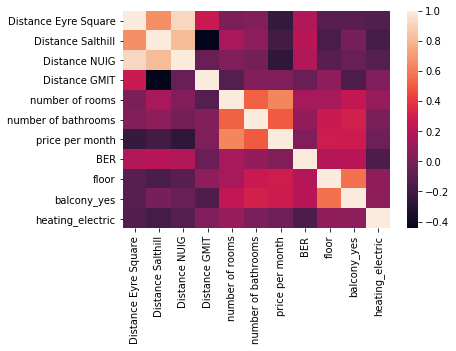

In [39]:
sns.heatmap(df.corr());


In [40]:
df.corr() #correlcation matric, similar to above but just the numbers 

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_yes,heating_electric
Distance Eyre Square,1.000000,0.663455,0.926371,0.270578,0.007667,0.031147,-0.238347,0.189864,-0.113979,-0.109624,-0.136956
Distance Salthill,0.663455,1.000000,0.818157,-0.445851,0.156446,0.070726,-0.191639,0.211516,-0.168657,-0.008140,-0.185803
Distance NUIG,0.926371,0.818157,1.000000,-0.050905,0.024757,-0.011669,-0.260979,0.188873,-0.113342,-0.061146,-0.125875
Distance GMIT,0.270578,-0.445851,-0.050905,1.000000,-0.129099,0.030170,0.019286,-0.051574,0.068969,-0.147997,0.020019
number of rooms,0.007667,0.156446,0.024757,-0.129099,1.000000,0.518498,0.634636,0.150870,0.147354,0.245295,0.102375
number of bathrooms,0.031147,0.070726,-0.011669,0.030170,0.518498,1.000000,0.502011,0.093304,0.266942,0.309843,0.004613
price per month,-0.238347,-0.191639,-0.260979,0.019286,0.634636,0.502011,1.000000,0.024436,0.286583,0.282128,-0.035162
BER,0.189864,0.211516,0.188873,-0.051574,0.150870,0.093304,0.024436,1.000000,0.197855,0.210166,-0.157382
floor,-0.113979,-0.168657,-0.113342,0.068969,0.147354,0.266942,0.286583,0.197855,1.000000,0.565649,0.075668
balcony_yes,-0.109624,-0.008140,-0.061146,-0.147997,0.245295,0.309843,0.282128,0.210166,0.565649,1.000000,0.071817


inverse, low dist erye square sathill collage gmit not important 
rooms and baths mid to hig importance 
ber isnt important 
higher the floor is mid important 
balcony low postivie 
electric heating doesn't seem to have much affect 

In [41]:
robust_scaler = RobustScaler()
df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms']] = robust_scaler.fit_transform(df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms']])

#can this handle negative values?? not sure might need to use a different method 

In [43]:
df.BER.unique()

array([ 9,  8,  4,  0,  3,  7,  5,  6, 10, 12,  2, 13, 15,  1])

In [45]:
df['BER'] = df['BER']/15


In [47]:
df.BER.unique() #has a non numerical value in there 

array([0.6       , 0.53333333, 0.26666667, 0.        , 0.2       ,
       0.46666667, 0.33333333, 0.4       , 0.66666667, 0.8       ,
       0.13333333, 0.86666667, 1.        , 0.06666667])

In [48]:
df.corr()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_yes,heating_electric
Distance Eyre Square,1.000000,0.663455,0.926371,0.270578,0.007667,0.031147,-0.238347,0.189864,-0.113979,-0.109624,-0.136956
Distance Salthill,0.663455,1.000000,0.818157,-0.445851,0.156446,0.070726,-0.191639,0.211516,-0.168657,-0.008140,-0.185803
Distance NUIG,0.926371,0.818157,1.000000,-0.050905,0.024757,-0.011669,-0.260979,0.188873,-0.113342,-0.061146,-0.125875
Distance GMIT,0.270578,-0.445851,-0.050905,1.000000,-0.129099,0.030170,0.019286,-0.051574,0.068969,-0.147997,0.020019
number of rooms,0.007667,0.156446,0.024757,-0.129099,1.000000,0.518498,0.634636,0.150870,0.147354,0.245295,0.102375
number of bathrooms,0.031147,0.070726,-0.011669,0.030170,0.518498,1.000000,0.502011,0.093304,0.266942,0.309843,0.004613
price per month,-0.238347,-0.191639,-0.260979,0.019286,0.634636,0.502011,1.000000,0.024436,0.286583,0.282128,-0.035162
BER,0.189864,0.211516,0.188873,-0.051574,0.150870,0.093304,0.024436,1.000000,0.197855,0.210166,-0.157382
floor,-0.113979,-0.168657,-0.113342,0.068969,0.147354,0.266942,0.286583,0.197855,1.000000,0.565649,0.075668
balcony_yes,-0.109624,-0.008140,-0.061146,-0.147997,0.245295,0.309843,0.282128,0.210166,0.565649,1.000000,0.071817


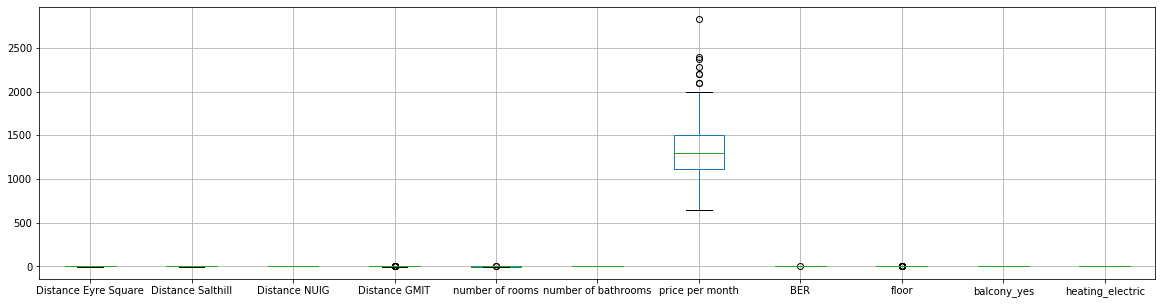

In [49]:
df.boxplot(figsize=(20,5))
plt.show() 

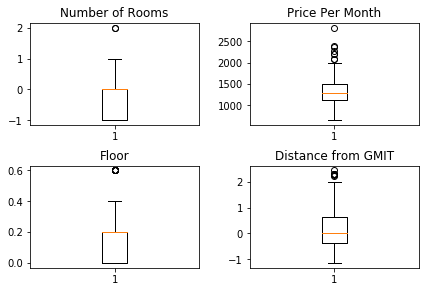

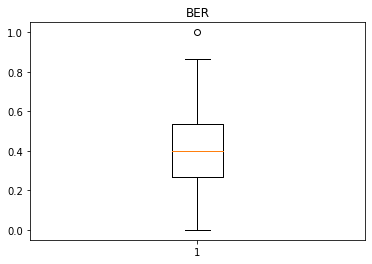

In [51]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(2, 2)


axs[0, 0].boxplot(df['number of rooms'])
axs[0, 0].set_title('Number of Rooms')

axs[0, 1].boxplot(df['price per month'])
axs[0, 1].set_title('Price Per Month')

axs[1, 1].boxplot(df['Distance GMIT'])
axs[1, 1].set_title('Distance from GMIT')

axs[1, 0].boxplot(df['floor'])
axs[1, 0].set_title('Floor')



fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

fig, ax = plt.subplots()
ax.boxplot(df['BER'])
ax.set_title('BER')
plt.show()

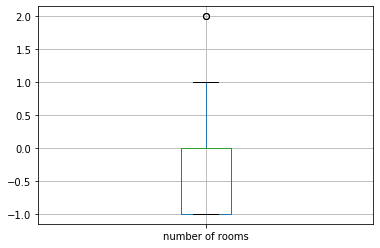

In [52]:
df.boxplot(column='number of rooms')
plt.show()

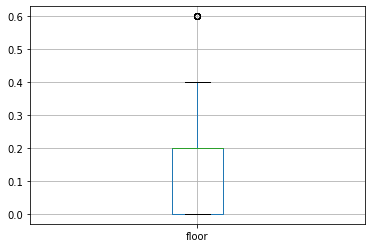

In [53]:
df.boxplot(column='floor')
plt.show()


In [54]:
df.describe()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,floor,balcony_yes,heating_electric
count,196.000000,196.000000,1.960000e+02,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.198552,0.169710,2.731675e-01,0.165235,-0.132653,0.484694,1356.693878,0.376871,0.154082,0.311224,0.586735
std,0.694894,0.733989,7.171367e-01,0.768527,0.634686,0.585964,356.217059,0.224860,0.175802,0.464180,0.493681
min,-0.764494,-0.872554,-6.528789e-01,-1.149246,-1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.374942,-0.412241,-3.008794e-01,-0.358378,-1.000000,0.000000,1116.750000,0.266667,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.186552e-17,0.000000,0.000000,0.000000,1300.000000,0.400000,0.200000,0.000000,1.000000
75%,0.625058,0.587759,6.991206e-01,0.641622,0.000000,1.000000,1500.000000,0.533333,0.200000,1.000000,1.000000
max,1.834177,1.915186,2.141822e+00,2.434592,2.000000,2.000000,2825.000000,1.000000,0.600000,1.000000,1.000000


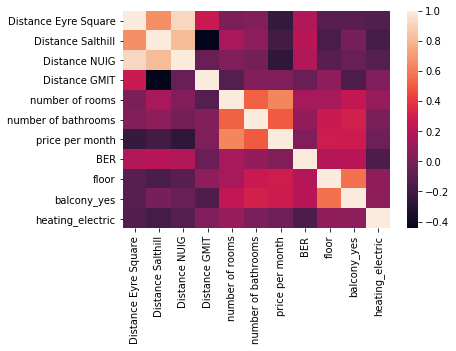

In [55]:
df_new=df.rename(columns={'pricer per month': 'price per month'})
df_new=df_new.rename(columns={'number of baths rooms': 'number of bath rooms'})
sns.heatmap(df_new.corr());

In [56]:
import statsmodels.api as sn 

In [57]:
X = sn.add_constant(df['number of rooms'])

In [58]:
ln=sn.OLS(df['price per month'],X).fit()

In [59]:
ln.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price per month   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.73e-23
Time:                        15:39:24   Log-Likelihood:                -1378.7
No. Observations:                 196   AIC:                             2761.
Df Residuals:                     194   BIC:                             2768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1403.9435     20.142     69.702      0.000    1364.218    1443.669
number of rooms   356.1894     31.141     11.438      0.000     294.772     417.607
==============================================================================
Omnibus:                       28.221   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.508
Skew:                           0.921   Prob(JB):                     1.18e-08
Kurtosis:                       4.037   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
y=df['price per month']

In [61]:
x=df[['number of rooms']]

In [62]:
ln2=LinearRegression()

In [63]:
ln2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print(ln2.intercept_,ln2.coef_)

1403.9434918160562 [356.18939984]


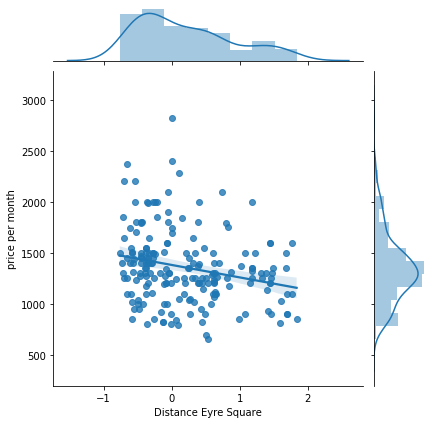

In [68]:
sns.jointplot(x=df['Distance Eyre Square'],y=df['price per month'],data=df,kind='reg')

In [70]:
x_multi=df.drop('price per month',axis=1) 



In [71]:
x_multi.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,BER,floor,balcony_yes,heating_electric
1,1.834177,0.795646,1.432636,2.434592,-1.0,0.0,0.600000,0.0,0,0
6,-0.281615,-0.609117,-0.182112,0.295014,0.0,1.0,0.533333,0.4,1,1
8,0.536216,0.992723,0.838073,-0.922471,-1.0,0.0,0.266667,0.0,0,1
9,-0.430726,0.186629,-0.073501,-0.496217,0.0,0.0,0.000000,0.0,0,0
11,0.574907,1.038144,0.753060,-0.506868,-1.0,0.0,0.000000,0.0,0,0


In [72]:
y_multi = df['price per month']

In [73]:
y_multi.head()

1      850
6     1500
8      650
9     1800
11    1000
Name: price per month, dtype: int64

In [74]:
x_multi_cons=sn.add_constant(x_multi) #adding constant 

In [75]:
x_multi_cons.head() # proxy for beta_0

,const,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,BER,floor,balcony_yes,heating_electric
1,1.0,1.834177,0.795646,1.432636,2.434592,-1.0,0.0,0.600000,0.0,0,0
6,1.0,-0.281615,-0.609117,-0.182112,0.295014,0.0,1.0,0.533333,0.4,1,1
8,1.0,0.536216,0.992723,0.838073,-0.922471,-1.0,0.0,0.266667,0.0,0,1
9,1.0,-0.430726,0.186629,-0.073501,-0.496217,0.0,0.0,0.000000,0.0,0,0
11,1.0,0.574907,1.038144,0.753060,-0.506868,-1.0,0.0,0.000000,0.0,0,0


In [76]:
ln_multi=sn.OLS(y_multi,x_multi_cons).fit()


In [77]:
ln_multi.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price per month   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     24.96
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.87e-29
Time:                        15:40:04   Log-Likelihood:                -1345.5
No. Observations:                 196   AIC:                             2713.
Df Residuals:                     185   BIC:                             2749.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1433.6642     50.629     28.317      0.000    1333.779    1533.549
Distance Eyre Square  -140.1663    137.381     -1.020      0.309    -411.200     130.868
Distance Salthill     -111.7884     65.699     -1.702      0.091    -241.403      17.827
Distance NUIG           87.4303    119.018      0.735      0.464    -147.378     322.238
Distance GMIT           31.3591     58.905      0.532      0.595     -84.852     147.570
number of rooms        325.5219     32.847      9.910      0.000     260.718     390.326
number of bathrooms    118.3024     36.413      3.249      0.001      46.464     190.141
BER                   -104.0694     82.770     -1.257      0.210    -267.363      59.225
floor                  199.7459    125.345      1.594      0.113     -47.543     447.034
balcony_yes             30.0339     47.381      0.634      0.527     -63.442     123.510
heating_electric      -126.6260     36.480     -3.471      0.001    -198.596     -54.656
==============================================================================
Omnibus:                       29.955   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.443
Skew:                           0.858   Prob(JB):                     1.36e-10
Kurtosis:                       4.619   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
lm3=LinearRegression()

In [79]:
lm3.fit(x_multi,y_multi)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
print(lm3.intercept_,lm3.coef_) 


1433.6642464595154 [-140.16632016 -111.78839352   87.43032405   31.35912755  325.52192769
  118.3023599  -104.06939816  199.74590793   30.03390706 -126.62604333]


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,Y_train,Y_test =train_test_split(x_multi,y_multi, test_size = 0.2,random_state=0)

In [84]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape) 

(156, 10) (40, 10) (156,) (40,)


In [85]:
ln_a =LinearRegression()

In [86]:
ln_a.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
Y_test_a=ln_a.predict(X_test)

In [88]:
Y_train_a=ln_a.predict(X_train)

In [89]:
from sklearn.metrics import r2_score

In [90]:
r2_score(Y_test,Y_test_a) 

0.6238027086002184

In [91]:
print(ln_a.intercept_,ln_a.coef_)

1406.6252067719831 [-194.45353821  -71.10532818  113.27352093   51.54520369  316.20136852
  110.25163235  -74.59915037  247.0008203    17.2041837  -113.75634672]


In [92]:
y_pred=ln_a.predict(X_test)

In [96]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss

In [97]:
from sklearn import metrics 

print('R2:',r2_score(Y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('RMSPE:',rmse(Y_test,y_pred))


R2: 0.6238027086002184
RMSE: 230.4190306881535
RMSPE: 16.860634648126176


R2 is not looking very good either  0.5180741978653729 on last run rmse of 265.37252356536646

In [98]:
print(ln_a.intercept_,ln_a.coef_)

1406.6252067719831 [-194.45353821  -71.10532818  113.27352093   51.54520369  316.20136852
  110.25163235  -74.59915037  247.0008203    17.2041837  -113.75634672]


different results to the one above that has no training in it 

In [99]:
from sklearn import preprocessing #ridhge lasso stuff

In [100]:
scaler=preprocessing.StandardScaler().fit(X_train)

In [101]:

X_train_s=X_train

In [102]:

X_test_s=X_test

In [103]:
from sklearn.linear_model import Ridge

In [104]:
ln_r=Ridge(alpha=0.5)
ln_r.fit(X_train_s,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
r2_score(Y_test,ln_r.predict(X_test_s))

0.6259070208072985

In [106]:
print(ln_r.intercept_,ln_r.coef_) #describes the line thats being drawn

1408.271883585182 [-156.54802588  -73.19537768   79.32922255   40.05348361  312.31575361
  110.8931693   -68.90994825  219.52454749   23.08372435 -110.51449169]


In [107]:
y_pred3=ln_r.predict(X_test)

In [108]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss

In [109]:
from sklearn import metrics 
print('R2:', r2_score(Y_test,ln_r.predict(X_test_s)))
#print('MAE:', metrics.mean_absolute_error(Y_test,y_pred3))
#print('MSE:',metrics.mean_squared_error(Y_test,y_pred3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))
print('RMSPE:',rmse(Y_test,y_pred))

R2: 0.6259070208072985
RMSE: 229.7736864163781
RMSPE: 16.860634648126176


In [110]:
from sklearn.model_selection import validation_curve

In [111]:
param_range=np.logspace(-2,8,100) #creates 100 values

In [112]:
param_range


array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [113]:
train_scores,test_scores=validation_curve(Ridge(),X_train_s,Y_train,"alpha",param_range,scoring='r2')

In [114]:
print(train_scores)
print(test_scores)

[[5.89756929e-01 5.32166916e-01 5.82663147e-01 5.87454790e-01
  5.21671585e-01]
 [5.89756561e-01 5.32166690e-01 5.82662500e-01 5.87454526e-01
  5.21671430e-01]
 [5.89755978e-01 5.32166331e-01 5.82661477e-01 5.87454108e-01
  5.21671183e-01]
 [5.89755056e-01 5.32165761e-01 5.82659867e-01 5.87453445e-01
  5.21670794e-01]
 [5.89753602e-01 5.32164860e-01 5.82657338e-01 5.87452395e-01
  5.21670178e-01]
 [5.89751312e-01 5.32163434e-01 5.82653380e-01 5.87450736e-01
  5.21669206e-01]
 [5.89747717e-01 5.32161184e-01 5.82647211e-01 5.87448119e-01
  5.21667677e-01]
 [5.89742091e-01 5.32157640e-01 5.82637649e-01 5.87444000e-01
  5.21665277e-01]
 [5.89733326e-01 5.32152073e-01 5.82622925e-01 5.87437535e-01
  5.21661525e-01]
 [5.89719742e-01 5.32143360e-01 5.82600433e-01 5.87427427e-01
  5.21655684e-01]
 [5.89698822e-01 5.32129778e-01 5.82566417e-01 5.87411691e-01
  5.21646637e-01]
 [5.89666852e-01 5.32108720e-01 5.82515581e-01 5.87387332e-01
  5.21632714e-01]
 [5.89618437e-01 5.32076283e-01 5.824406

In [115]:
train_mean=np.mean(train_scores,axis=1)

In [116]:
test_mean=np.mean(test_scores,axis=1)

In [117]:
train_mean

array([5.62742673e-01, 5.62742341e-01, 5.62741815e-01, 5.62740985e-01,
       5.62739675e-01, 5.62737614e-01, 5.62734382e-01, 5.62729331e-01,
       5.62721477e-01, 5.62709329e-01, 5.62690669e-01, 5.62662240e-01,
       5.62619346e-01, 5.62555361e-01, 5.62461163e-01, 5.62324543e-01,
       5.62129665e-01, 5.61856692e-01, 5.61481686e-01, 5.60976876e-01,
       5.60311312e-01, 5.59451756e-01, 5.58363417e-01, 5.57009847e-01,
       5.55351062e-01, 5.53338976e-01, 5.50909621e-01, 5.47972309e-01,
       5.44396683e-01, 5.39999227e-01, 5.34531341e-01, 5.27671675e-01,
       5.19026478e-01, 5.08143025e-01, 4.94542004e-01, 4.77773127e-01,
       4.57492394e-01, 4.33549693e-01, 4.06065248e-01, 3.75469445e-01,
       3.42487421e-01, 3.08066533e-01, 2.73263585e-01, 2.39120164e-01,
       2.06554130e-01, 1.76285696e-01, 1.48803921e-01, 1.24369221e-01,
       1.03041834e-01, 8.47246780e-02, 6.92104077e-02, 5.62252333e-02,
       4.54651986e-02, 3.66233035e-02, 2.94077794e-02, 2.35529017e-02,
      

In [118]:
max(test_mean)

0.4702112146509223

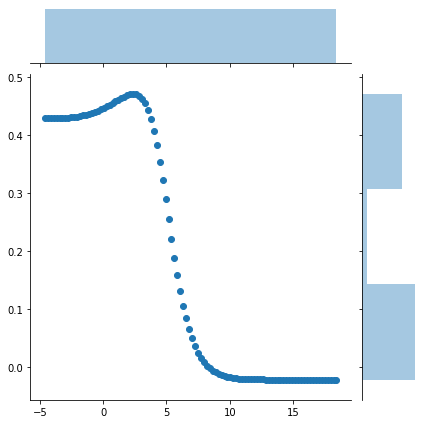

In [119]:
sns.jointplot(x=np.log(param_range),y=test_mean) #highest point is from the max above 

In [120]:
np.where(test_mean==max(test_mean))

(array([30]),)

In [121]:
param_range[30]

10.722672220103231

In [122]:
ln_r_best=Ridge(alpha=param_range[30])

In [123]:
ln_r_best.fit(X_train_s,Y_train)

Ridge(alpha=10.722672220103231, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
r2_score(Y_test,ln_r_best.predict(X_test_s))

0.5995065509328863

In [125]:
r2_score(Y_train,ln_r_best.predict(X_train_s))

0.5350075119426185

In [126]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)



In [127]:
print ("Ridge model:", pretty_print_coefs(ln_r_best.coef_)) #https://www.datacamp.com/community/tutorials/feature-selection-python

Ridge model: -63.476 * X0 + -52.029 * X1 + -22.869 * X2 + 14.759 * X3 + 254.272 * X4 + 120.859 * X5 + -20.0 * X6 + 70.174 * X7 + 47.664 * X8 + -73.46 * X9


In [128]:
ln_r_best.coef_

array([-63.4760159 , -52.029461  , -22.86860224,  14.75924731,
       254.2721469 , 120.8589865 , -20.00018028,  70.17431315,
        47.66446658, -73.45963053])

In [129]:
# info about ridge method https://machinelearningmastery.com/ridge-regression-with-python/ https://scikit-learn.org/stable/modules/linear_model.html
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html As expected, none of the coefficients are exactly zero - ridge regression does not perform variable selection!

In [130]:
y_pred2=ln_r_best.predict(X_test)

In [131]:
from sklearn import metrics 

print('R2:', r2_score(Y_test,ln_r_best.predict(X_test_s)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))
print('RMSPE:',rmse(Y_test,y_pred2))

R2: 0.5995065509328863
RMSE: 237.74326433572224
RMSPE: 17.445980348726597


In [132]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss

In [133]:
print('1 R2:',r2_score(Y_test,Y_test_a))
print('2 R2:', r2_score(Y_test,ln_r.predict(X_test_s)))
print('3 R2:', r2_score(Y_test,ln_r_best.predict(X_test_s)))
print('')
print('1 MAE:', metrics.mean_absolute_error(Y_test,y_pred))
print('2 MAE:', metrics.mean_absolute_error(Y_test,y_pred3))
print('3 MAE:', metrics.mean_absolute_error(Y_test,y_pred2))
print('')
print('1 MSE:',metrics.mean_squared_error(Y_test,y_pred))
print('2 MSE:',metrics.mean_squared_error(Y_test,y_pred3))
print('3 MSE:',metrics.mean_squared_error(Y_test,y_pred2))
print('')
print('1 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('2 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))
print('3 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))
print('*')
print('* 1 RMSPE:',rmse(Y_test,y_pred))
print('* 2 RMSPE:',rmse(Y_test,y_pred3))
print('* 3 RMSPE:',rmse(Y_test,y_pred2))

# here is looks like hte simple linergression has done the best job 

1 R2: 0.6238027086002184
2 R2: 0.6259070208072985
3 R2: 0.5995065509328863

1 MAE: 185.17483592441724
2 MAE: 184.93346274512066
3 MAE: 191.52340348541503

1 MSE: 53092.92970326822
2 MSE: 52795.94696937206
3 MSE: 56521.85973700511

1 RMSE: 230.4190306881535
2 RMSE: 229.7736864163781
3 RMSE: 237.74326433572224
*
* 1 RMSPE: 16.860634648126176
* 2 RMSPE: 16.84130397446934
* 3 RMSPE: 17.445980348726597


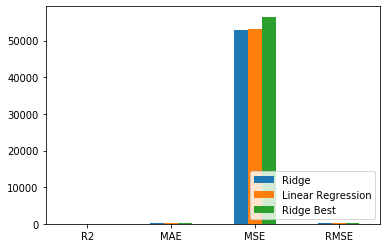

In [134]:
LR_metrics =np.array([r2_score(Y_test,Y_test_a),metrics.mean_absolute_error(Y_test,y_pred),metrics.mean_squared_error(Y_test,y_pred),np.sqrt(metrics.mean_squared_error(Y_test,y_pred))])
R_metrics=np.array([r2_score(Y_test,ln_r.predict(X_test_s)),metrics.mean_absolute_error(Y_test,y_pred3),metrics.mean_squared_error(Y_test,y_pred3),np.sqrt(metrics.mean_squared_error(Y_test,y_pred3))])
RB_metrics=np.array([r2_score(Y_test,ln_r_best.predict(X_test_s)),metrics.mean_absolute_error(Y_test,y_pred2),metrics.mean_squared_error(Y_test,y_pred2),np.sqrt(metrics.mean_squared_error(Y_test,y_pred2))])
index = ['R2', 'MAE', 'MSE','RMSE']
df_metrics = pd.DataFrame({'Ridge': R_metrics, 'Linear Regression': LR_metrics,'Ridge Best': RB_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()


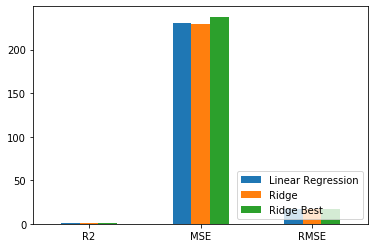

In [135]:
LR2_metrics =np.array([r2_score(Y_test,Y_test_a),np.sqrt(metrics.mean_squared_error(Y_test,y_pred)),rmse(Y_test,y_pred)])
R2_metrics=np.array([r2_score(Y_test,ln_r.predict(X_test_s)),np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)),rmse(Y_test,y_pred3)])
RB2_metrics=np.array([r2_score(Y_test,ln_r_best.predict(X_test_s)),np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)),rmse(Y_test,y_pred2)])
index2 = ['R2',  'MSE','RMSE']
df_metrics2 = pd.DataFrame({'Linear Regression': LR2_metrics, 'Ridge': R2_metrics, 'Ridge Best': RB2_metrics}, index=index2)
df_metrics2.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

In [136]:
df_metrics2

,Linear Regression,Ridge,Ridge Best
R2,0.623803,0.625907,0.599507
MSE,230.419031,229.773686,237.743264
RMSE,16.860635,16.841304,17.445980


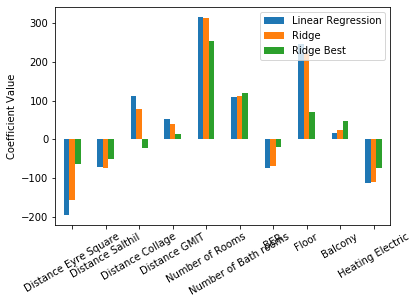

In [137]:
index3=['Distance Eyre Square','Distance Salthil','Distance Collage','Distance GMIT','Number of Rooms','Number of Bath rooms','BER','Floor','Balcony','Heating Electric']
All_coef=pd.DataFrame({'Linear Regression': ln_a.coef_, 'Ridge': ln_r.coef_, 'Ridge Best': ln_r_best.coef_}, index=index3)

All_coef.plot.bar(rot=0)



plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Coefficient Value')
plt.legend(loc="upper right")
plt.show()


In [138]:
LR_metrics2=np.delete(LR_metrics,2)
R_metrics2=np.delete(R_metrics,2)
RB_metrics2=np.delete(RB_metrics,2)


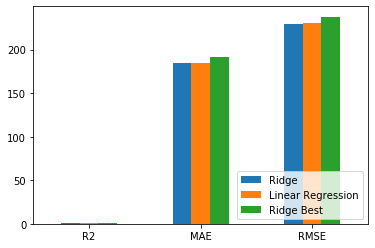

In [139]:
index = ['R2', 'MAE','RMSE']
df_metrics = pd.DataFrame({'Ridge': R_metrics2, 'Linear Regression': LR_metrics2,'Ridge Best': RB_metrics2}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

Seesm Iinear Regression does the best, need to change the sclar to the one that was recommened and seem how that works out 

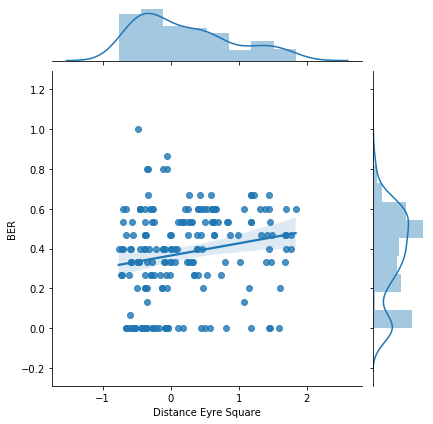

In [140]:
sns.jointplot(x=df['Distance Eyre Square'],y=df['BER'],data=df,kind='reg')